<a href="https://colab.research.google.com/github/LexanderThakur/MLPROJECT/blob/main/ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Cleaned_Artworks.csv")  # Replace with your file name
columns_to_drop = [
    "AccessionNumber", "CreditLine", "ObjectID", "OnView",
    "Circumference (cm)", "Diameter (cm)", "Seat Height (cm)", "Duration (sec.)"
]

df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)
df.fillna("Unknown", inplace=True)

for col in df.select_dtypes(include="number").columns:
    df[col] = df[col].fillna(df[col].mean())



from sklearn.preprocessing import LabelEncoder

label_cols = ["Nationality", "Medium", "Classification", "Department"]
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.to_csv("Transformed_Artworks.csv", index=False)
print("✅ Transformed dataset saved!")

<ipython-input-5-56fac69b16ce>:4: DtypeWarning: Columns (5,6,8,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Cleaned_Artworks.csv")  # Replace with your file name
<ipython-input-5-56fac69b16ce>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Unknown", inplace=True)


✅ Transformed dataset saved!


<ipython-input-3-2cf93894b4ca>:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Transformed_Artworks.csv")


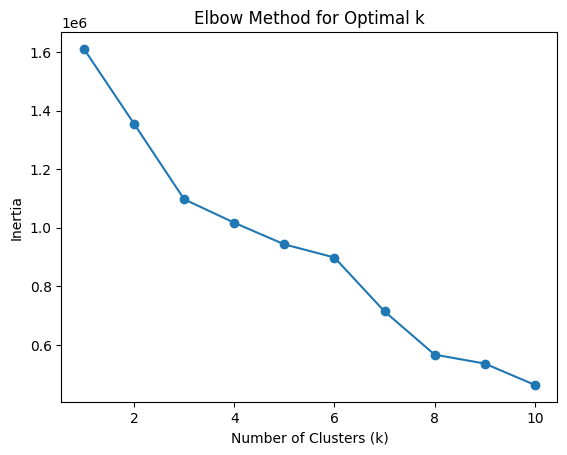

In [ ]:
import pandas as pd

# Load your cleaned and transformed dataset
df = pd.read_csv("Transformed_Artworks.csv")
features = [
    "Nationality", "Medium",
    "Classification", "Department", "Height (cm)", "Width (cm)", "Length (cm)"
]
df = df.replace("Unknown", -1).fillna(-1)

X = df[features]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
